In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import operator

G = nx.read_graphml('marvel.graphml')

## Original Graph

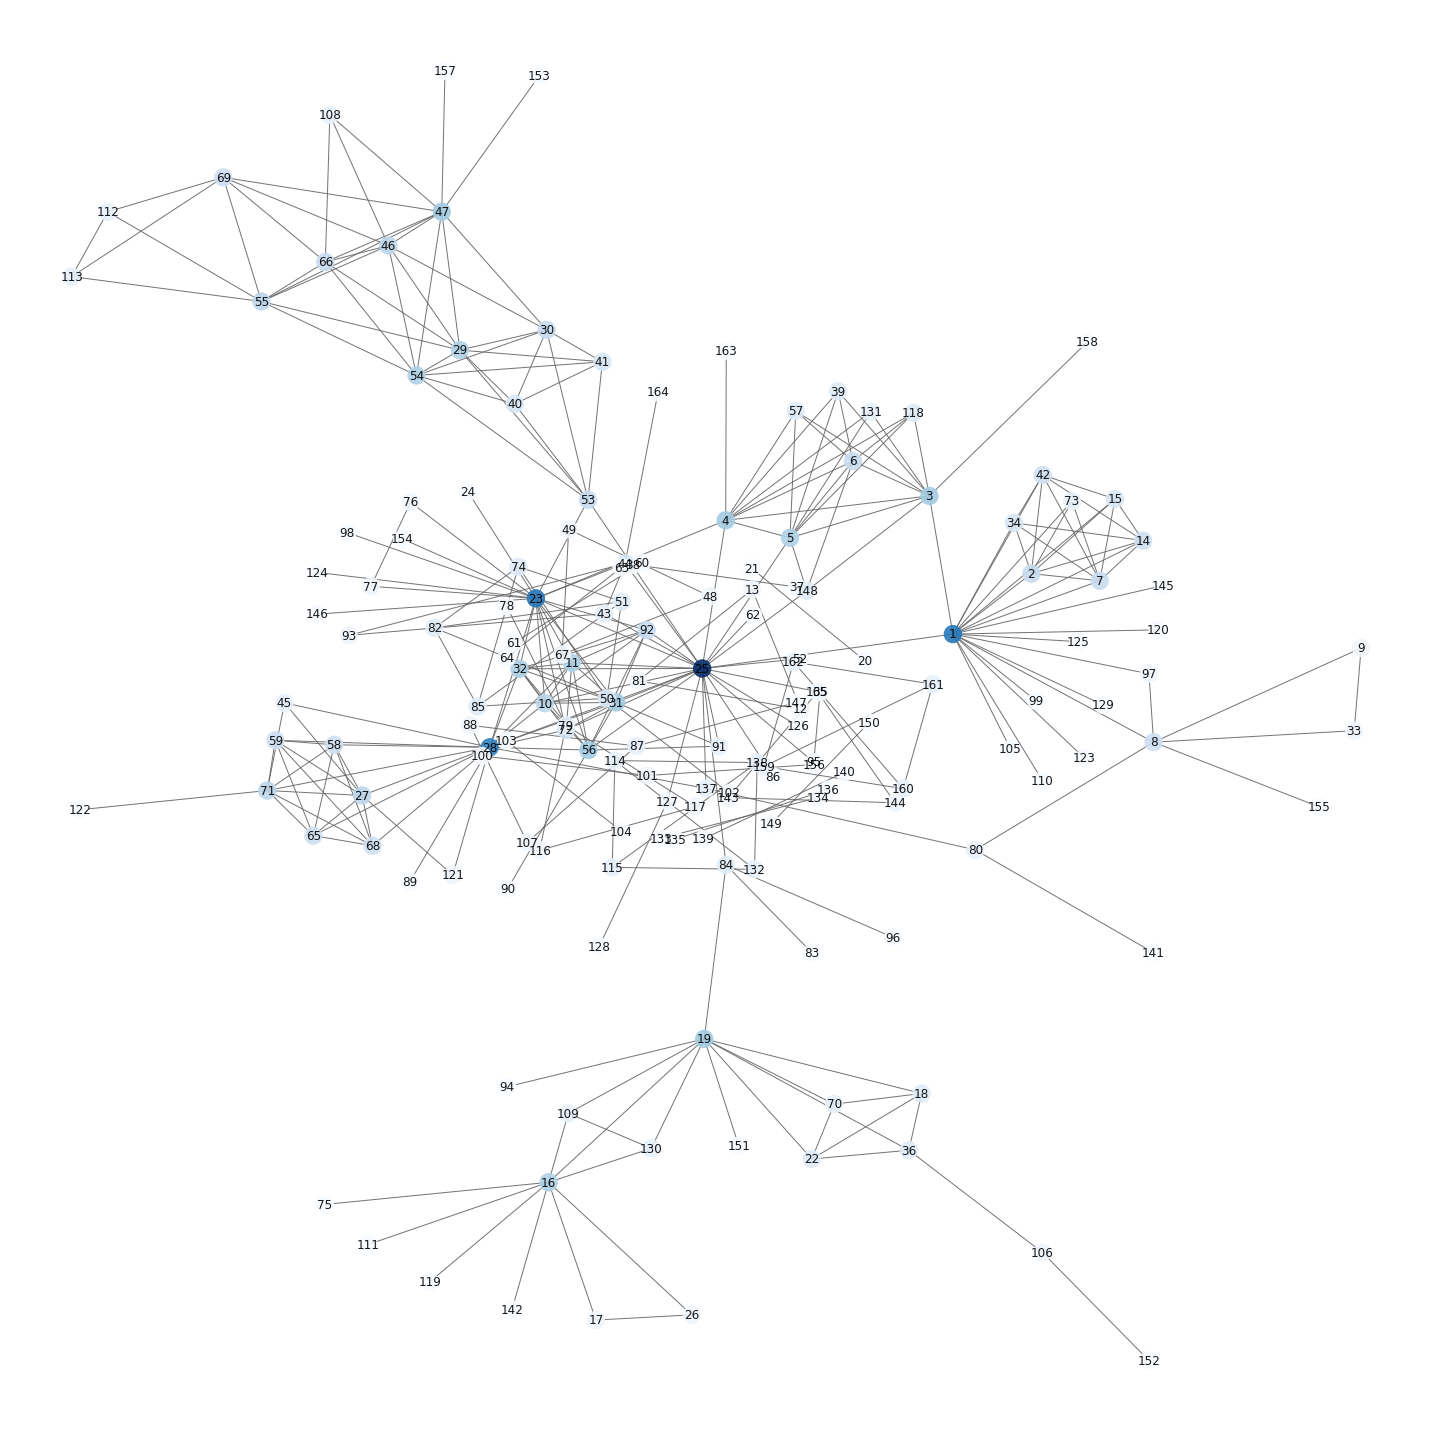

In [2]:
plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
node_color = [G.degree(v) for v in G]
nx.draw_networkx(G, pos, node_color=node_color, alpha=0.9, with_labels=True, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

## Properties

In [3]:
G.number_of_nodes()

165

In [4]:
G.number_of_edges()

300

In [5]:
nx.is_connected(G)

False

In [6]:
nx.number_connected_components(G)

19

In [7]:
list(nx.connected_components(G))

[{'1',
  '10',
  '105',
  '106',
  '108',
  '109',
  '11',
  '110',
  '111',
  '112',
  '113',
  '118',
  '119',
  '120',
  '121',
  '122',
  '123',
  '124',
  '125',
  '126',
  '127',
  '128',
  '129',
  '130',
  '131',
  '137',
  '14',
  '141',
  '142',
  '145',
  '146',
  '148',
  '15',
  '151',
  '152',
  '153',
  '154',
  '155',
  '157',
  '158',
  '16',
  '163',
  '164',
  '17',
  '18',
  '19',
  '2',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '3',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '39',
  '4',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '5',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '6',
  '62',
  '65',
  '66',
  '68',
  '69',
  '7',
  '70',
  '71',
  '72',
  '73',
  '75',
  '76',
  '77',
  '8',
  '80',
  '83',
  '84',
  '86',
  '89',
  '9',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99'},
 {'12', '13', '81'},
 {'20', '21'},
 {'37', '38'},
 {'48', '49', '6

## Core Characters Graph

In [8]:
core_characters = max(nx.connected_components(G), key=len)

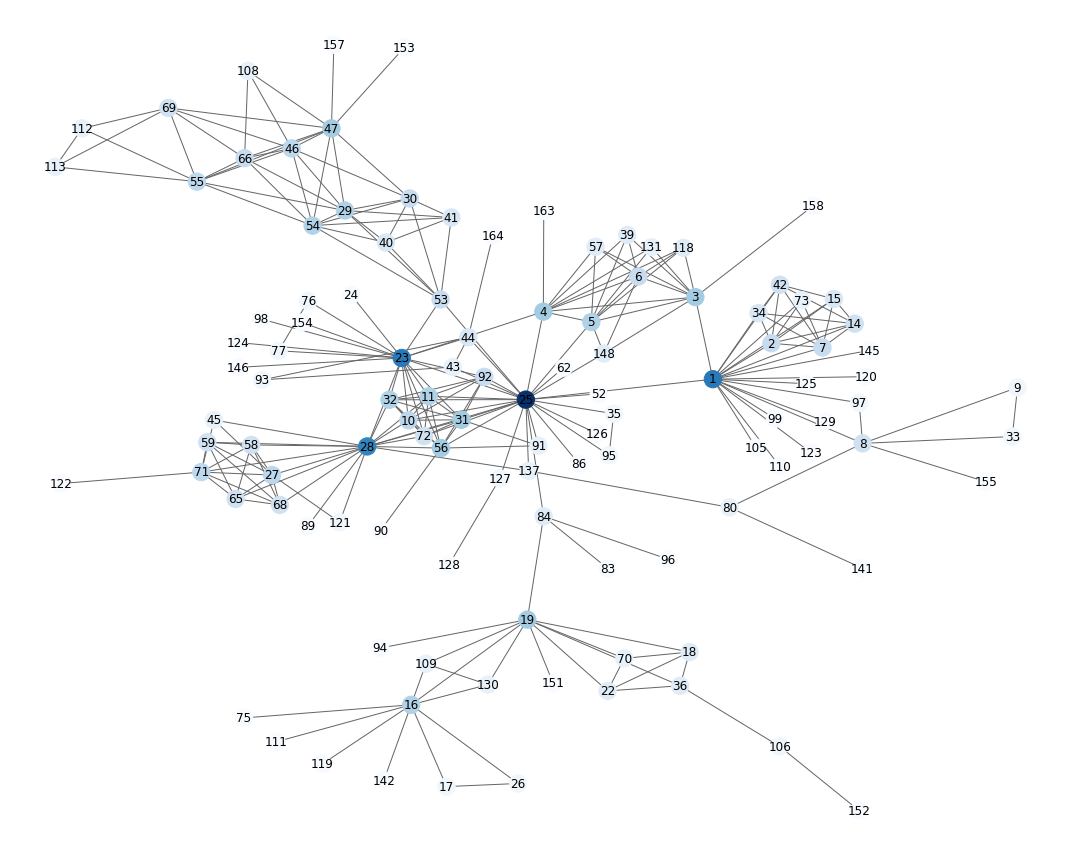

In [9]:
core = G.subgraph(core_characters)

plt.figure(figsize=(15,12))
pos = nx.kamada_kawai_layout(G)
node_color = [core.degree(v) for v in core]
nx.draw_networkx(core, pos, node_color=node_color, alpha=1.0, with_labels=True, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

## Core Properties

In [10]:
core.number_of_nodes()

113

In [11]:
core.number_of_edges()

249

In [12]:
nx.density(core)

0.039348925410872315

In [13]:
nx.is_connected(core)

True

In [14]:
nx.average_shortest_path_length(core)

3.9056573957016436

In [15]:
nx.diameter(core)

9

In [16]:
nx.radius(core)

5

In [17]:
nx.center(core)

['25', '84']

In [18]:
nx.periphery(core)

['69', '108', '112', '113', '152', '153', '157']

## Node and Edge Connectivity

In [19]:
nx.node_connectivity(core)

1

In [20]:
nx.minimum_node_cut(core)

{'84'}

In [21]:
nx.edge_connectivity(core)

1

In [22]:
nx.minimum_edge_cut(core)

{('84', '19')}

## Clustering Coefficients

In [23]:
nx.average_clustering(core)

0.48971727293379946

In [24]:
nx.transitivity(core)

0.4424920127795527

## Degree Centrality

In [25]:
degree_centrality = nx.degree_centrality(core) 
sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[('25', 0.23214285714285712),
 ('1', 0.16964285714285712),
 ('23', 0.16964285714285712),
 ('28', 0.1607142857142857),
 ('3', 0.08928571428571427)]

In [26]:
degree_sequence = sorted([d for n, d in core.degree()], reverse=True)[0:5]
degree_sequence

[26, 19, 19, 18, 10]

## Closeness Centrality

In [27]:
closeness_centrality = nx.closeness_centrality(core) 
sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[('25', 0.45528455284552843),
 ('23', 0.3783783783783784),
 ('1', 0.3660130718954248),
 ('84', 0.35331230283911674),
 ('28', 0.3510971786833856)]

## Betweenness Centrality

In [28]:
# Endpoints = False
bet_centrality = nx.betweenness_centrality(core, normalized = True, endpoints = False) 
sorted(bet_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[('25', 0.7046154572940286),
 ('1', 0.32222400972400994),
 ('84', 0.301962676962677),
 ('19', 0.27364864864864863),
 ('53', 0.23407335907335908)]

In [29]:
# Endpoints = True
bet_centrality = nx.betweenness_centrality(core, normalized = True, endpoints = True) 
sorted(bet_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[('25', 0.7098435022976745),
 ('1', 0.3342200449501336),
 ('84', 0.3143173198482933),
 ('19', 0.2865044247787611),
 ('53', 0.247629582806574)]

In [30]:
btwnCent_edge = nx.edge_betweenness_centrality(core, normalized=True)
sorted(btwnCent_edge.items(), key=operator.itemgetter(1), reverse=True)[0:28]

[(('25', '84'), 0.30530973451327437),
 (('19', '84'), 0.2702275600505689),
 (('1', '25'), 0.2696340778199187),
 (('25', '53'), 0.1900969237252424),
 (('25', '28'), 0.11848210523147308),
 (('16', '19'), 0.11504424778761063),
 (('29', '53'), 0.07911135693215347),
 (('53', '54'), 0.07911135693215346),
 (('23', '25'), 0.06932153392330384),
 (('1', '8'), 0.06908449220396123),
 (('23', '53'), 0.05516224188790564),
 (('19', '36'), 0.05088495575221239),
 (('4', '25'), 0.047758137178175085),
 (('30', '53'), 0.043104719764011916),
 (('5', '25'), 0.04106829309895048),
 (('23', '28'), 0.037461245560170976),
 (('1', '3'), 0.03601629442337407),
 (('25', '127'), 0.03508217446270544),
 (('36', '106'), 0.03508217446270544),
 (('25', '137'), 0.03489780868099453),
 (('28', '71'), 0.033027812895069536),
 (('25', '44'), 0.03236158770292778),
 (('80', '137'), 0.031500210703750524),
 (('4', '23'), 0.029743217345935408),
 (('29', '55'), 0.0258902233459756),
 (('54', '55'), 0.0258902233459756),
 (('25', '43'),

## Page Rank

In [31]:
pr = nx.pagerank(core, alpha = 0.8) 
sorted(pr.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[('25', 0.04654871351187023),
 ('1', 0.042415520571016566),
 ('23', 0.03427521429122175),
 ('16', 0.027482214713827308),
 ('28', 0.02643655763195389)]

## Katz Centrality:
#### Reference: https://www.geeksforgeeks.org/katz-centrality-centrality-measure/?ref=rp

In [32]:
katz_centrality = nx.katz_centrality(core) 
sorted(katz_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[('25', 0.3690569020302751),
 ('23', 0.30959618993871385),
 ('28', 0.3055108195944117),
 ('31', 0.25912536100249384),
 ('11', 0.24995549718559235)]

## Eigenvector Centrality
##### Reference: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html

In [33]:
eigen_centrality = nx.eigenvector_centrality(core)
sorted(eigen_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[('25', 0.3864038257237879),
 ('23', 0.33426797633078903),
 ('28', 0.32842999429958003),
 ('31', 0.290443557830282),
 ('11', 0.28037845443758125)]

## Top 12 Important Nodes (Top 10%)

In [34]:
central_nodes = []

i = 0
degree_centrality = nx.degree_centrality(core) 
degree_centrality = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:12]
for tup in degree_centrality:
    central_nodes.append(int(degree_centrality[i][0]))
    i += 1

i = 0
closeness_centrality = nx.closeness_centrality(core) 
closeness_centrality = sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:12]
for tup in closeness_centrality:
    central_nodes.append(int(closeness_centrality[i][0]))
    i += 1

i = 0
bet_centrality = nx.betweenness_centrality(core, normalized = True, endpoints = False) 
bet_centrality = sorted(bet_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:12]
for tup in bet_centrality:
    central_nodes.append(int(bet_centrality[i][0]))
    i += 1
    
i = 0
pr = nx.pagerank(core, alpha = 0.8) 
pr = sorted(pr.items(), key=operator.itemgetter(1), reverse = True)[0:12]
for tup in pr:
    central_nodes.append(int(pr[i][0]))
    i += 1
    
i = 0
katz_centrality = nx.katz_centrality(core) 
katz_centrality = sorted(katz_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:12]
for tup in katz_centrality:
    central_nodes.append(int(katz_centrality[i][0]))
    i += 1
    
i = 0
eigen_centrality = nx.eigenvector_centrality(core)
eigen_centrality = sorted(eigen_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:12]
for tup in eigen_centrality:
    central_nodes.append(int(eigen_centrality[i][0]))
    i += 1

In [35]:
rm_duplicates = []
for node in central_nodes:
    if rm_duplicates.count(node) == 0:
        rm_duplicates.append(node)

In [36]:
node_counts = []
for node in rm_duplicates:
    node_counts.append(central_nodes.count(node))
    
node_counts = sorted(node_counts, reverse=True)[0:12]

In [37]:
final_nodes = []
for count in node_counts:
    for node in rm_duplicates:
        if central_nodes.count(node) == count and node not in final_nodes:
            final_nodes.append(node)
        
final_nodes[0:12]

[25, 23, 28, 4, 1, 56, 31, 11, 19, 32, 10, 3]

## Verification

In [38]:
for node in rm_duplicates:
    if central_nodes.count(node)==2:
        print(node)

3
47
5
84
53
16
8
92
72


## Visualization

In [39]:
string_nodes = []
for node in final_nodes:
    string_nodes.append(str(node))

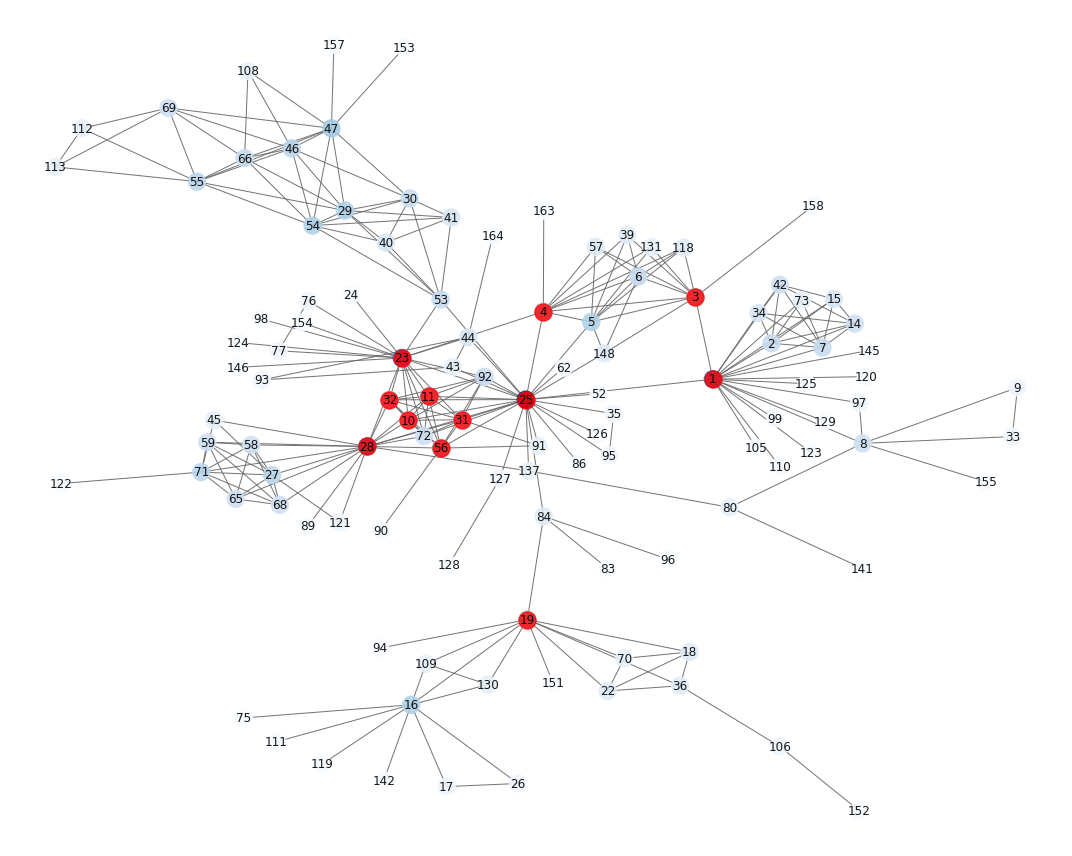

In [40]:
core = G.subgraph(core_characters)

plt.figure(figsize=(15,12))
pos = nx.kamada_kawai_layout(G)
node_color = [core.degree(v) for v in core]
nx.draw_networkx(core, pos, node_color=node_color, alpha=0.9, with_labels=True, edge_color='.4', cmap=plt.cm.Blues)

nx.draw_networkx_nodes(G, pos, nodelist=string_nodes[0:12], node_color='r', alpha=0.8, width=2)


plt.axis('off')
plt.tight_layout();

## Top 17 Important Nodes (Top 15%)

In [41]:
central_nodes = []

i = 0
degree_centrality = nx.degree_centrality(core) 
degree_centrality = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:17]
for tup in degree_centrality:
    central_nodes.append(int(degree_centrality[i][0]))
    i += 1

i = 0
closeness_centrality = nx.closeness_centrality(core) 
closeness_centrality = sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:17]
for tup in closeness_centrality:
    central_nodes.append(int(closeness_centrality[i][0]))
    i += 1

i = 0
bet_centrality = nx.betweenness_centrality(core, normalized = True, endpoints = False) 
bet_centrality = sorted(bet_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:17]
for tup in bet_centrality:
    central_nodes.append(int(bet_centrality[i][0]))
    i += 1
    
i = 0
pr = nx.pagerank(core, alpha = 0.8) 
pr = sorted(pr.items(), key=operator.itemgetter(1), reverse = True)[0:17]
for tup in pr:
    central_nodes.append(int(pr[i][0]))
    i += 1
    
i = 0
katz_centrality = nx.katz_centrality(core) 
katz_centrality = sorted(katz_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:17]
for tup in katz_centrality:
    central_nodes.append(int(katz_centrality[i][0]))
    i += 1
    
i = 0
eigen_centrality = nx.eigenvector_centrality(core)
eigen_centrality = sorted(eigen_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:17]
for tup in eigen_centrality:
    central_nodes.append(int(eigen_centrality[i][0]))
    i += 1

In [42]:
rm_duplicates = []
for node in central_nodes:
    if rm_duplicates.count(node) == 0:
        rm_duplicates.append(node)

In [43]:
node_counts = []
for node in rm_duplicates:
    node_counts.append(central_nodes.count(node))
    
node_counts = sorted(node_counts, reverse=True)[0:17]

In [44]:
final_nodes = []
for count in node_counts:
    for node in rm_duplicates:
        if central_nodes.count(node) == count and node not in final_nodes:
            final_nodes.append(node)
        
final_nodes[0:17]

[25, 23, 28, 4, 1, 31, 56, 5, 11, 32, 10, 53, 3, 19, 47, 16, 72]

## Verification

In [45]:
for node in rm_duplicates:
    if central_nodes.count(node)==3:
        print(node)

3
19
47
16
72
92
71


## Visualization

In [46]:
string_nodes = []
for node in final_nodes:
    string_nodes.append(str(node))

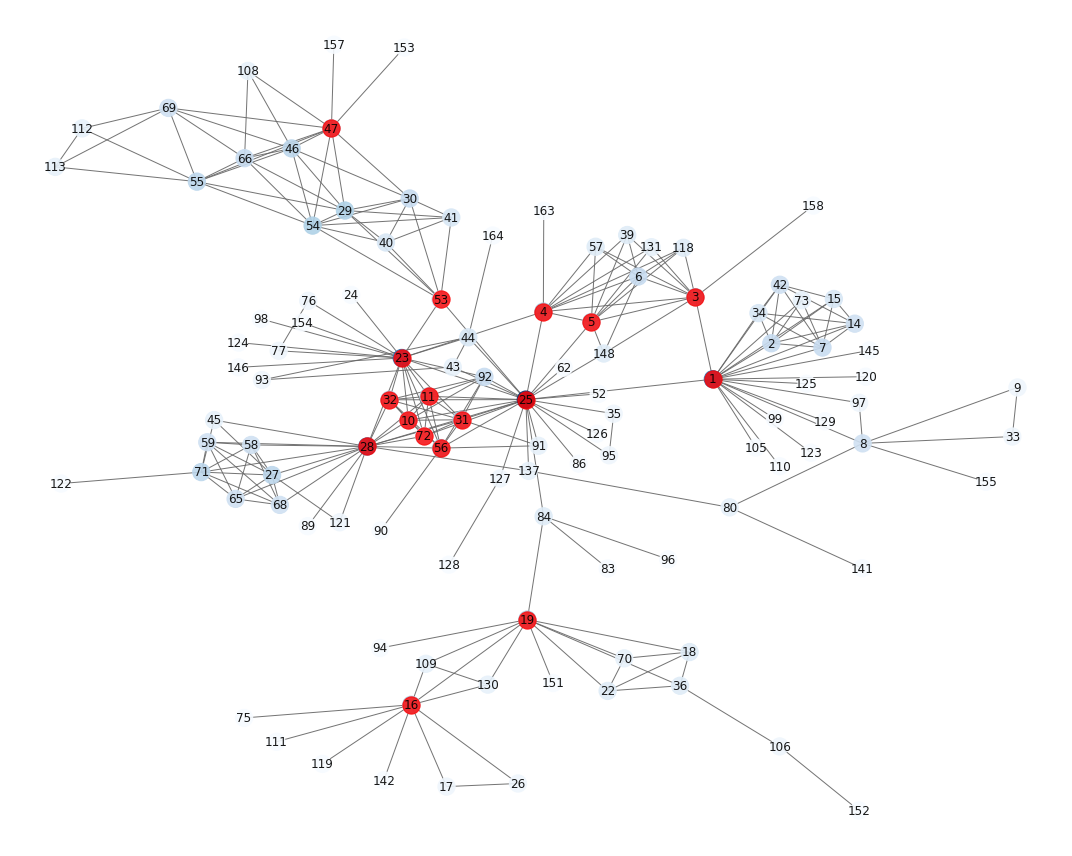

In [47]:
core = G.subgraph(core_characters)

plt.figure(figsize=(15,12))
pos = nx.kamada_kawai_layout(G)
node_color = [core.degree(v) for v in core]
nx.draw_networkx(core, pos, node_color=node_color, alpha=0.9, with_labels=True, edge_color='.4', cmap=plt.cm.Blues)

nx.draw_networkx_nodes(G, pos, nodelist=string_nodes[0:17], node_color='r', alpha=0.8, width=2)


plt.axis('off')
plt.tight_layout();

## Top 23 Important Nodes (Top 20%)

In [48]:
central_nodes = []

i = 0
degree_centrality = nx.degree_centrality(core) 
degree_centrality = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:23]
for tup in degree_centrality:
    central_nodes.append(int(degree_centrality[i][0]))
    i += 1

i = 0
closeness_centrality = nx.closeness_centrality(core) 
closeness_centrality = sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:23]
for tup in closeness_centrality:
    central_nodes.append(int(closeness_centrality[i][0]))
    i += 1

i = 0
bet_centrality = nx.betweenness_centrality(core, normalized = True, endpoints = False) 
bet_centrality = sorted(bet_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:23]
for tup in bet_centrality:
    central_nodes.append(int(bet_centrality[i][0]))
    i += 1
    
i = 0
pr = nx.pagerank(core, alpha = 0.8) 
pr = sorted(pr.items(), key=operator.itemgetter(1), reverse = True)[0:23]
for tup in pr:
    central_nodes.append(int(pr[i][0]))
    i += 1
    
i = 0
katz_centrality = nx.katz_centrality(core) 
katz_centrality = sorted(katz_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:23]
for tup in katz_centrality:
    central_nodes.append(int(katz_centrality[i][0]))
    i += 1
    
i = 0
eigen_centrality = nx.eigenvector_centrality(core)
eigen_centrality = sorted(eigen_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:23]
for tup in eigen_centrality:
    central_nodes.append(int(eigen_centrality[i][0]))
    i += 1

In [49]:
rm_duplicates = []
for node in central_nodes:
    if rm_duplicates.count(node) == 0:
        rm_duplicates.append(node)

In [50]:
node_counts = []
for node in rm_duplicates:
    node_counts.append(central_nodes.count(node))
    
node_counts = sorted(node_counts, reverse=True)[0:23]

In [51]:
final_nodes = []
for count in node_counts:
    for node in rm_duplicates:
        if central_nodes.count(node) == count and node not in final_nodes:
            final_nodes.append(node)
        
final_nodes[0:23]

[25,
 1,
 23,
 28,
 4,
 56,
 5,
 31,
 11,
 32,
 71,
 3,
 10,
 27,
 53,
 44,
 19,
 47,
 16,
 29,
 54,
 55,
 84]

## Verification

In [52]:
for node in rm_duplicates:
    if central_nodes.count(node)==3:
        print(node)

19
47
16
29
54
55
84
72
137
92
91


## Visualization

In [53]:
string_nodes = []
for node in final_nodes:
    string_nodes.append(str(node))

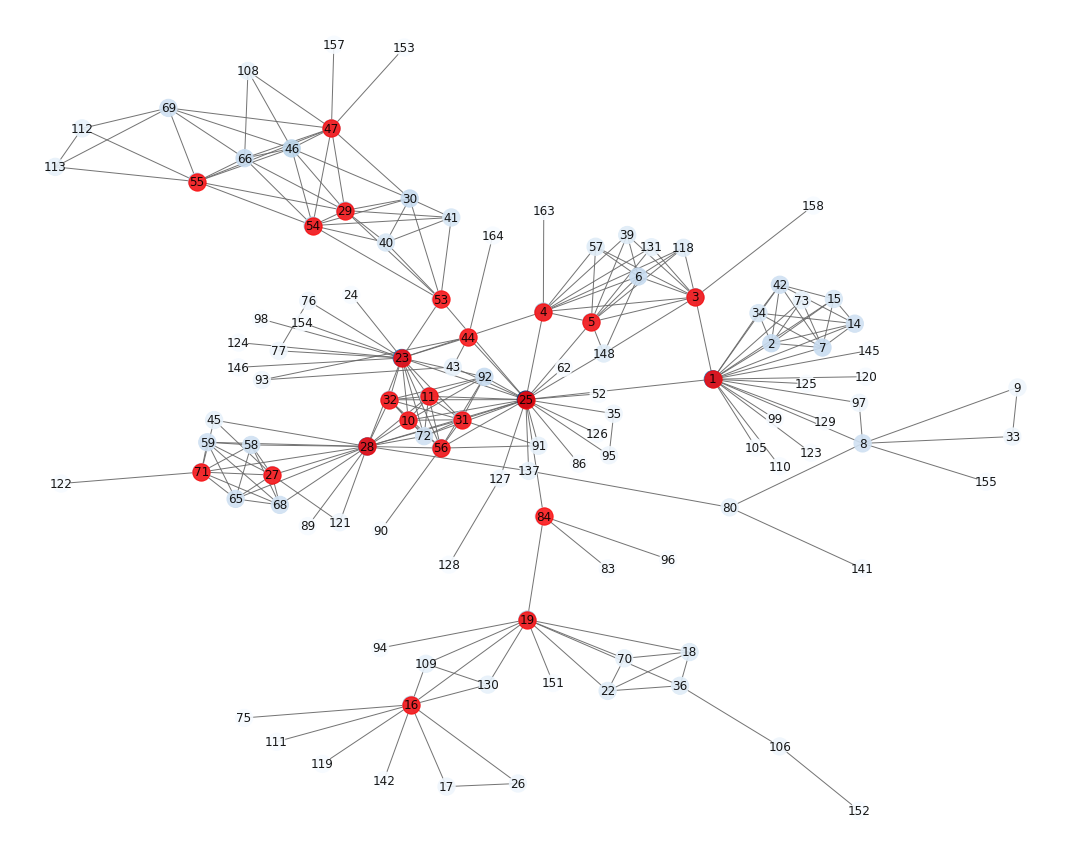

In [54]:
core = G.subgraph(core_characters)

plt.figure(figsize=(15,12))
pos = nx.kamada_kawai_layout(G)
node_color = [core.degree(v) for v in core]
nx.draw_networkx(core, pos, node_color=node_color, alpha=0.9, with_labels=True, edge_color='.4', cmap=plt.cm.Blues)

nx.draw_networkx_nodes(G, pos, nodelist=string_nodes[0:23], node_color='r', alpha=0.8, width=2)


plt.axis('off')
plt.tight_layout();

## Top 28 Important Nodes (Top 25%)

In [55]:
central_nodes = []

i = 0
degree_centrality = nx.degree_centrality(core) 
degree_centrality = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:28]
for tup in degree_centrality:
    central_nodes.append(int(degree_centrality[i][0]))
    i += 1

i = 0
closeness_centrality = nx.closeness_centrality(core) 
closeness_centrality = sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:28]
for tup in closeness_centrality:
    central_nodes.append(int(closeness_centrality[i][0]))
    i += 1

i = 0
bet_centrality = nx.betweenness_centrality(core, normalized = True, endpoints = False) 
bet_centrality = sorted(bet_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:28]
for tup in bet_centrality:
    central_nodes.append(int(bet_centrality[i][0]))
    i += 1
    
i = 0
pr = nx.pagerank(core, alpha = 0.8) 
pr = sorted(pr.items(), key=operator.itemgetter(1), reverse = True)[0:28]
for tup in pr:
    central_nodes.append(int(pr[i][0]))
    i += 1
    
i = 0
katz_centrality = nx.katz_centrality(core) 
katz_centrality = sorted(katz_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:28]
for tup in katz_centrality:
    central_nodes.append(int(katz_centrality[i][0]))
    i += 1
    
i = 0
eigen_centrality = nx.eigenvector_centrality(core)
eigen_centrality = sorted(eigen_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:28]
for tup in eigen_centrality:
    central_nodes.append(int(eigen_centrality[i][0]))
    i += 1

In [56]:
rm_duplicates = []
for node in central_nodes:
    if rm_duplicates.count(node) == 0:
        rm_duplicates.append(node)

In [57]:
node_counts = []
for node in rm_duplicates:
    node_counts.append(central_nodes.count(node))
    
node_counts = sorted(node_counts, reverse=True)[0:28]

In [58]:
final_nodes = []
for count in node_counts:
    for node in rm_duplicates:
        if central_nodes.count(node) == count and node not in final_nodes:
            final_nodes.append(node)
        
final_nodes[0:28]

[25,
 1,
 23,
 28,
 3,
 4,
 56,
 5,
 31,
 11,
 32,
 10,
 71,
 53,
 44,
 29,
 54,
 27,
 92,
 137,
 148,
 19,
 47,
 16,
 46,
 55,
 6,
 84]

## Verification

In [59]:
for node in rm_duplicates:
    if central_nodes.count(node)==3:
        print(node)

19
47
16
46
55
6
84
72
91


## Visualization

In [60]:
string_nodes = []
for node in final_nodes:
    string_nodes.append(str(node))

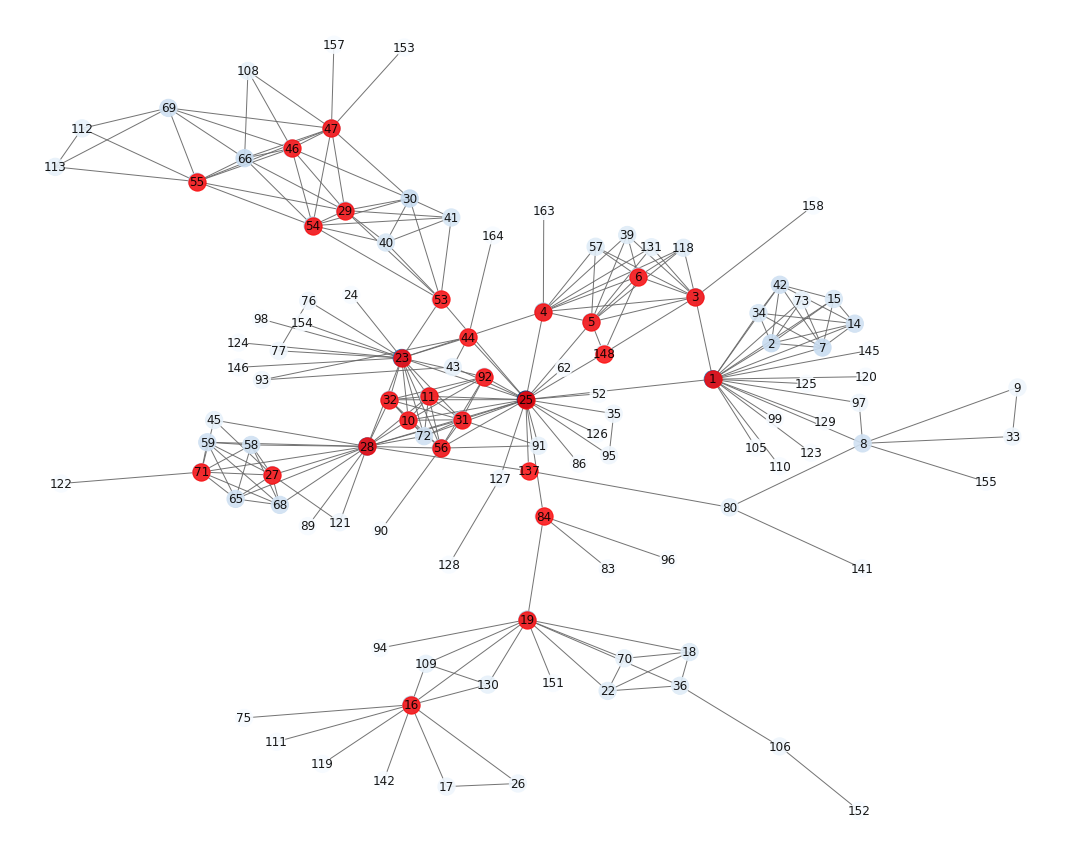

In [61]:
core = G.subgraph(core_characters)

plt.figure(figsize=(15,12))
pos = nx.kamada_kawai_layout(G)
node_color = [core.degree(v) for v in core]
nx.draw_networkx(core, pos, node_color=node_color, alpha=0.9, with_labels=True, edge_color='.4', cmap=plt.cm.Blues)

nx.draw_networkx_nodes(G, pos, nodelist=string_nodes[0:28], node_color='r', alpha=0.8, width=2)


plt.axis('off')
plt.tight_layout();

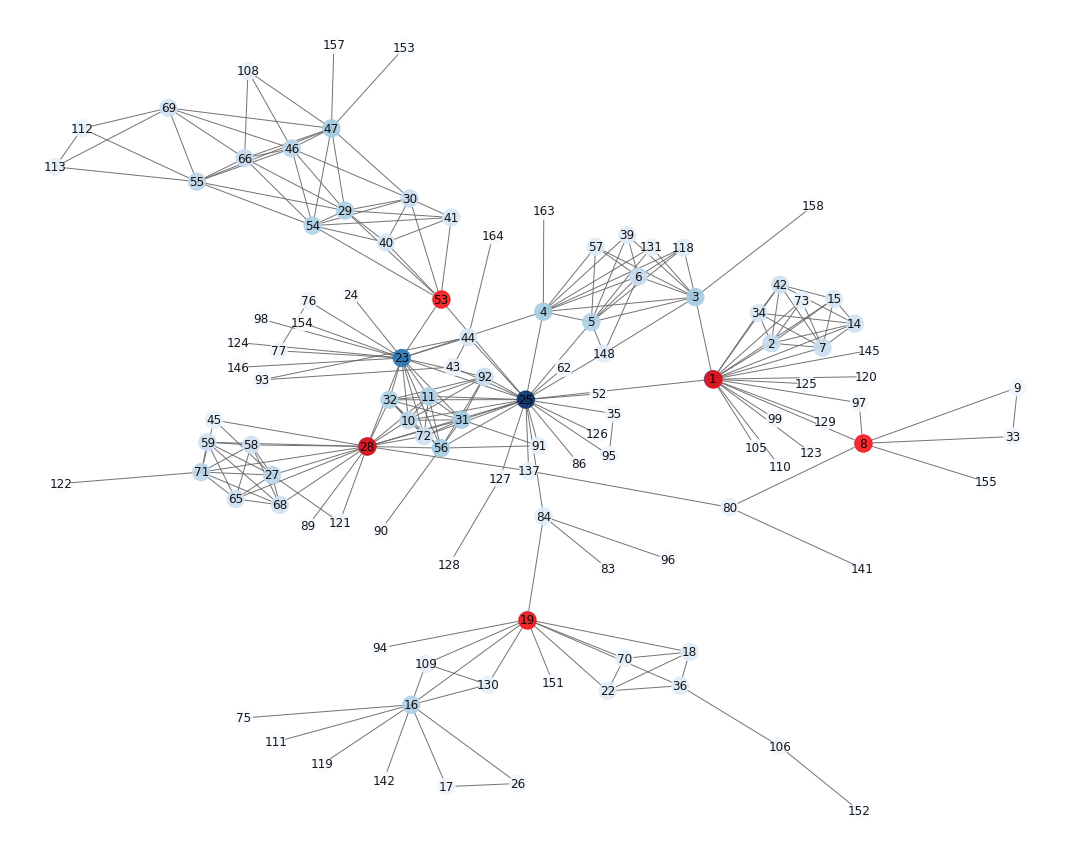

In [62]:
core = G.subgraph(core_characters)

plt.figure(figsize=(15,12))
pos = nx.kamada_kawai_layout(G)
node_color = [core.degree(v) for v in core]
nx.draw_networkx(core, pos, node_color=node_color, alpha=0.9, with_labels=True, edge_color='.4', cmap=plt.cm.Blues)

nx.draw_networkx_nodes(G, pos, nodelist=['53', '1', '28', '19', '8'], node_color='r', alpha=0.8, width=2)


plt.axis('off')
plt.tight_layout();